In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv('../Data_Cleaning/Data/gurgaon_properties_v2.csv').drop_duplicates()
df = df.iloc[:, 2:]

In [12]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat             ss the leaf   sector 85   2.20          6934.0   
1          flat           m3m sierra 68   sector 68   1.08          8674.0   
2          flat           ashiana anmol  sohna road   0.99          8215.0   
3         house             independent   sector 38   8.00        230547.0   
4          flat  puri diplomatic greens  sector 111   3.70         12542.0   

     area                                       areaWithType  bedRoom  \
0  3173.0             Super Built up area 2812(261.24 sq.m.)      4.0   
1  1245.0  Super Built up area 1245(115.66 sq.m.)Built Up...      2.0   
2  1205.0  Super Built up area 1205(111.95 sq.m.)Carpet a...      2.0   
3   347.0  Built Up area: 347 (32.24 sq.m.)Carpet area: 2...     10.0   
4  2950.0  Super Built up area 2950(274.06 sq.m.)Built Up...      4.0   

   bathroom balcony  floorNum      facing   agePossession  \
0       5.0      3+       4.0        East  Relatively New   
1       2.0       3       1.0        West  Relatively New   
2       2.0       2       6.0        East       Undefined   
3      10.0      3+       1.0       North       Undefined   
4       5.0      3+      12.0  South-East  Relatively New   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2812.0            NaN          NaN           0             0   
1               1245.0         1130.0        930.0           0             0   
2               1205.0            NaN        900.0           0             0   
3                  NaN          347.0        215.0           0             0   
4               2950.0         2650.0       2450.0           0             1   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                1           106  
1           0           0       0                0           149  
2           0           0       0                1            49  
3           0           0       0                1             0  
4           0           0       0                0           158

# property_type vs price

<Axes: xlabel='property_type', ylabel='price'>

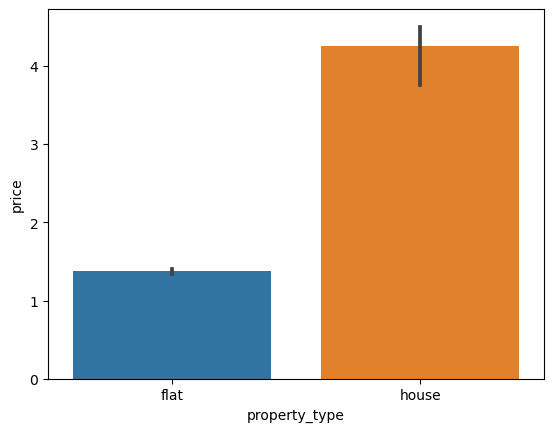

In [13]:
sns.barplot(x=df['property_type'], y=df['price'], estimator='median')

<Axes: xlabel='property_type', ylabel='price'>

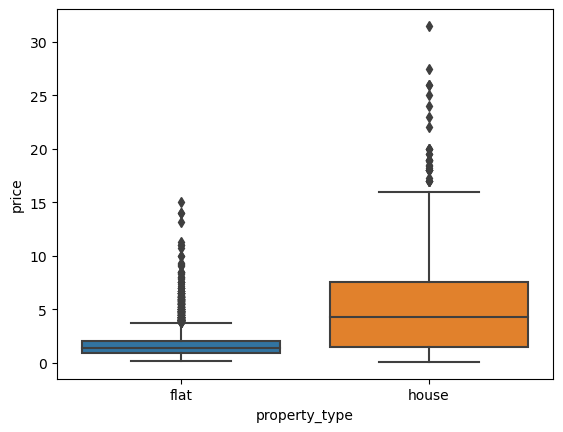

In [14]:
sns.boxplot(x=df['property_type'], y=df['price'])

# property_type vs area

<Axes: xlabel='property_type', ylabel='built_up_area'>

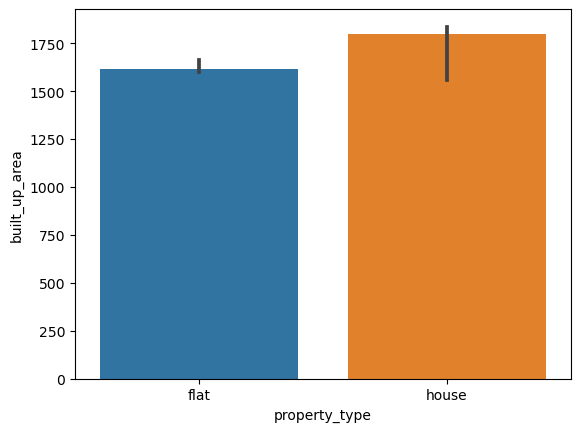

In [15]:
sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator='median')

<Axes: xlabel='property_type', ylabel='built_up_area'>

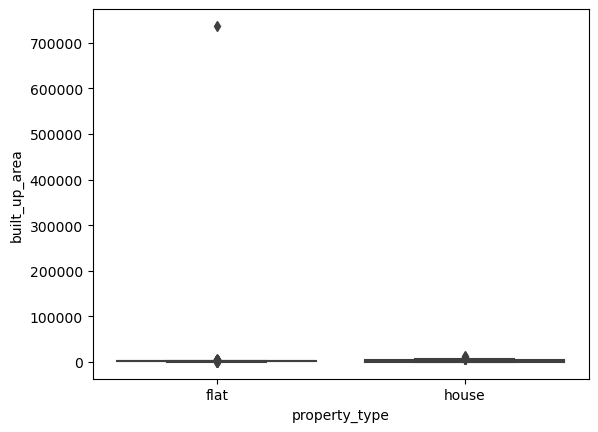

In [16]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [18]:
# Removing extreme outliers
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

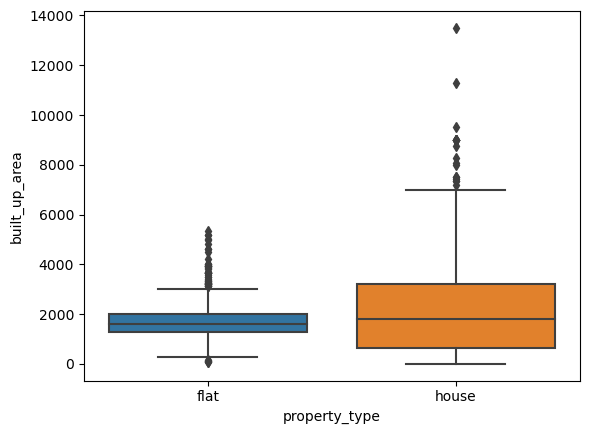

In [19]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

# property_type vs price_per_sqft

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

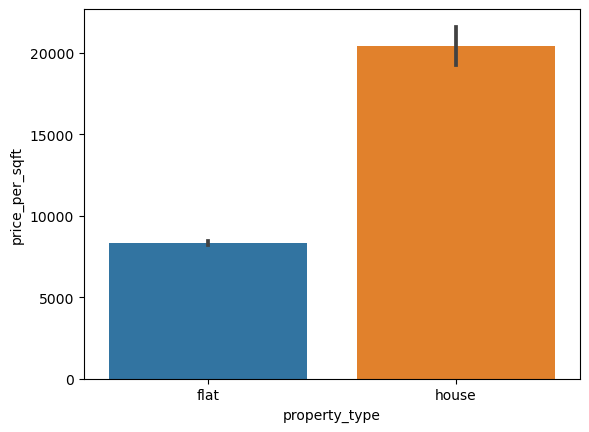

In [21]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator='median')

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

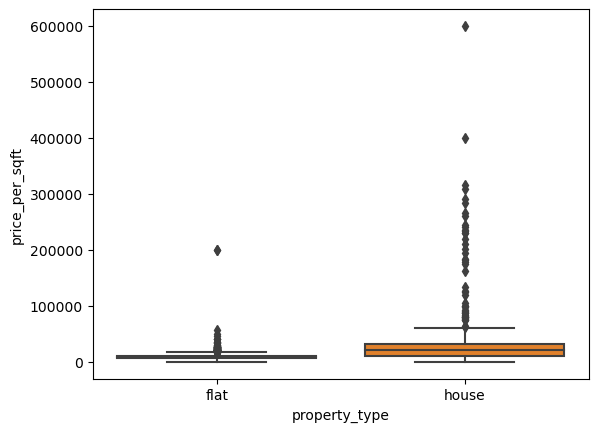

In [22]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

In [25]:
# Check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].head()

property_type                   society     sector  price  price_per_sqft  \
3           house               independent  sector 38    8.0        230547.0   
84          house  unitech uniworld resorts  sector 33    9.5        173992.0   
102         house               independent  sector 57    8.0        266666.0   
124         house    dlf city plots phase 2  sector 25   10.0        400000.0   
174          flat        ambience caitriona  sector 24   14.0        200000.0   

      area                                       areaWithType  \
3    347.0  Built Up area: 347 (32.24 sq.m.)Carpet area: 2...   
84   546.0                         Plot area 546(50.73 sq.m.)   
102  300.0                         Plot area 300(27.87 sq.m.)   
124  250.0                         Plot area 250(23.23 sq.m.)   
174  700.0                   Built Up area: 700 (65.03 sq.m.)   

     super_built_up_area  built_up_area  carpet_area  
3                    NaN          347.0        215.0  
84                   NaN          546.0          NaN  
102                  NaN          300.0          NaN  
124                  NaN          250.0          NaN  
174                  NaN          700.0          NaN

# property_type vs bedRoom

<Axes: xlabel='bedRoom', ylabel='property_type'>

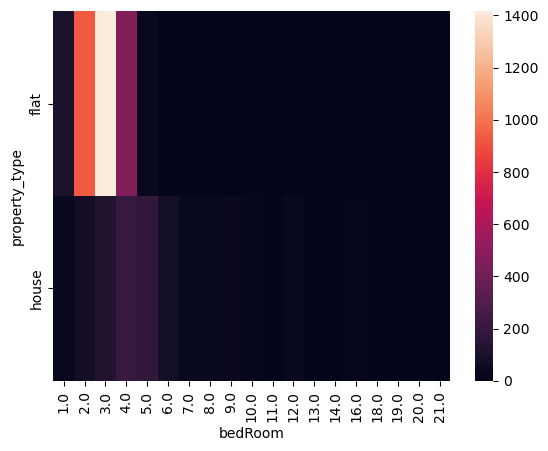

In [26]:
sns.heatmap(pd.crosstab(df['property_type'], df['bedRoom']))

In [27]:
# Checking outliers
df[df['bedRoom'] >= 10]

property_type                 society     sector  price  price_per_sqft  \
3            house             independent  sector 38   8.00        230547.0   
77           house             independent  sector 13   2.25          6944.0   
124          house  dlf city plots phase 2  sector 25  10.00        400000.0   
137          house             independent  sector 26  14.75         51864.0   
223          house          uppal southend  sector 49   6.75         31915.0   
...            ...                     ...        ...    ...             ...   
3546         house             independent  sector 54   5.00         43066.0   
3603         house             independent  sector 11   1.35          3857.0   
3675         house             independent  sector 43   4.50         39062.0   
3683         house             independent  sector 14   8.00         17707.0   
3734         house             independent  sector 25    NaN             NaN   

        area                                       areaWithType  bedRoom  \
3      347.0  Built Up area: 347 (32.24 sq.m.)Carpet area: 2...     10.0   
77    3240.0                    Carpet area: 360 (301.01 sq.m.)     10.0   
124    250.0                         Plot area 250(23.23 sq.m.)     12.0   
137   2844.0                        Plot area 316(264.22 sq.m.)     16.0   
223   2115.0                        Plot area 235(196.49 sq.m.)     12.0   
...      ...                                                ...      ...   
3546  1161.0                        Plot area 129(107.86 sq.m.)     21.0   
3603  3500.0                       Plot area 3500(325.16 sq.m.)     10.0   
3675  1152.0                        Plot area 128(107.02 sq.m.)     20.0   
3683  4518.0                        Plot area 502(419.74 sq.m.)     12.0   
3734     NaN  Plot area 250(209.03 sq.m.)Built Up area: 260 ...     12.0   

      bathroom balcony  floorNum      facing   agePossession  \
3         10.0      3+       1.0       North       Undefined   
77        10.0       2       1.0        East       Undefined   
124       12.0      3+       4.0       North  Relatively New   
137       20.0      3+       4.0        East    New Property   
223       12.0      3+       3.0        West  Moderately Old   
...        ...     ...       ...         ...             ...   
3546      21.0      3+       5.0       North  Relatively New   
3603       6.0      3+       3.0         NaN    Old Property   
3675      20.0      3+       4.0        East  Relatively New   
3683       4.0      3+       3.0       North    Old Property   
3734      12.0      3+       4.0  North-East    New Property   

      super_built_up_area  built_up_area  carpet_area  study room  \
3                     NaN          347.0        215.0           0   
77                    NaN            NaN        360.0           0   
124                   NaN          250.0          NaN           1   
137                   NaN         2844.0          NaN           1   
223                   NaN         2115.0          NaN           0   
...                   ...            ...          ...         ...   
3546                  NaN         1161.0          NaN           0   
3603                  NaN         3500.0          NaN           0   
3675                  NaN         1152.0          NaN           0   
3683                  NaN         4518.0          NaN           0   
3734                  NaN          260.0        245.0           1   

      servant room  store room  pooja room  others  furnishing_type  \
3                0           0           0       0                1   
77               0           0           0       0                1   
124              1           0           0       0                0   
137              1           1           1       0                0   
223              0           0           0       1                1   
...            ...         ...         ...     ...              ...   
3546             1           0      

# property_type vs floorNum

<Axes: xlabel='property_type', ylabel='floorNum'>

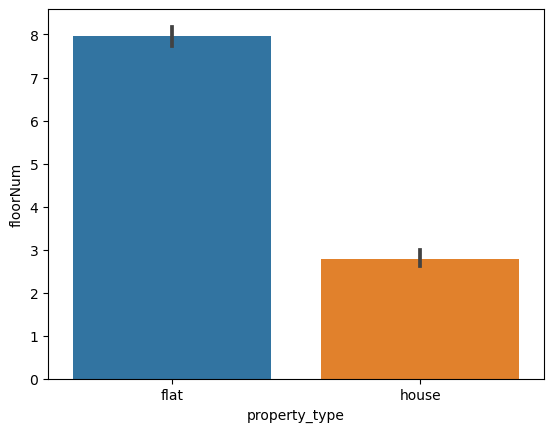

In [28]:
sns.barplot(x=df['property_type'], y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

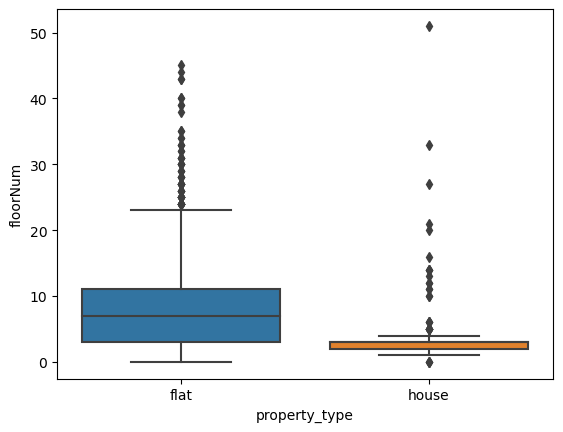

In [29]:
sns.boxplot(x=df['property_type'], y=df['floorNum'])

In [30]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

property_type                  society      sector  price  \
5            house      satya the hermitage  sector 103   3.15   
49           house           dlf the arbour   sector 63   8.50   
906          house              greenopolis   sector 89   0.70   
1042         house          godrej meridien  sector 106   5.60   
2115         house              spaze privy   sector 72   3.09   
2147         house         suncity township   sector 54   2.00   
2419         house              spaze privy   sector 72   3.10   
2548         house              independent   sector 92   1.80   
2628         house   vatika the seven lamps   sector 82   1.60   
3007         house      ireo victory valley   sector 67   8.00   
3216         house               ninex city   sector 76   1.75   
3226         house  indiabulls centrum park  sector 103   3.25   
3526         house        suncity avenue 76   sector 76   0.75   
3589         house           ats tourmaline  sector 109   1.87   

      price_per_sqft    area  \
5             6702.0  4700.0   
49           21519.0  3950.0   
906           5397.0  1297.0   
1042         14000.0  4000.0   
2115          6981.0  4426.0   
2147         30968.0   646.0   
2419          8486.0  3653.0   
2548          7627.0  2360.0   
2628          6597.0  2425.0   
3007         22222.0  3600.0   
3216          6250.0  2800.0   
3226          8125.0  4000.0   
3526         10067.0   745.0   
3589          8697.0  2150.0   

                                           areaWithType  bedRoom  bathroom  \
5                    Built Up area: 4700 (436.64 sq.m.)      4.0       5.0   
49                   Built Up area: 3950 (366.97 sq.m.)      4.0       4.0   
906                   Built Up area: 1297 (120.5 sq.m.)      2.0       2.0   
1042                       Plot area 4000(371.61 sq.m.)      5.0       4.0   
2115  Built Up area: 3653 (339.37 sq.m.)Carpet area:...      5.0       5.0   
2147  Plot area 60Built Up area: 60 sq.m.Carpet area...      9.0       9.0   
2419                       Plot area 3653(339.37 sq.m.)      5.0       5.0   
2548                 Built Up area: 2360 (219.25 sq.m.)      4.0       5.0   
2628                       Plot area 2425(225.29 sq.m.)      4.0       4.0   
3007                        Plot area 400(334.45 sq.m.)      6.0       7.0   
3216                   Carpet area: 2800 (260.13 sq.m.)      4.0       4.0   
3226                       Plot area 4000(371.61 sq.m.)      4.0       3.0   
3526  Plot area 745(69.21 sq.m.)Built Up area: 745 s...      2.0       2.0   
3589                 Built Up area: 2150 (199.74 sq.m.)      3.0       4.0   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
5          0      12.0        East       Undefined                  NaN   
49        3+      27.0         NaN       Undefined                  NaN   
906        2      14.0  North-East       Undefined                  NaN   
1042      3+      33.0  North-East    New Property                  NaN   
2115      3+      14.0        East  Relatively New                  NaN   
2147       3      11.0       North  Relatively New                  NaN   
2419      3+      21.0         NaN  Relatively New                  NaN   
2548       0      13.0         NaN       Undefined                  NaN   
2628      3+      16.0       North  Moderately Old                  NaN   
3007      3+      51.0  North-East  Moderately Old                  NaN   
3216       0      14.0         NaN       Undefined                  NaN   
3226      3+      20.0         NaN       Undefined                  NaN   
3526       2      11.0  North-East    New Property                  NaN   
3589       0      12.0         NaN       Undefined                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
5            4700.0          NaN           0             0           0   
49           3950.0          NaN           0             0           0   
906          1

In [ ]:
# The high storey houses are villas but in apartments

In [31]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat             ss the leaf   sector 85   2.20          6934.0   
1          flat           m3m sierra 68   sector 68   1.08          8674.0   
2          flat           ashiana anmol  sohna road   0.99          8215.0   
3         house             independent   sector 38   8.00        230547.0   
4          flat  puri diplomatic greens  sector 111   3.70         12542.0   

     area                                       areaWithType  bedRoom  \
0  3173.0             Super Built up area 2812(261.24 sq.m.)      4.0   
1  1245.0  Super Built up area 1245(115.66 sq.m.)Built Up...      2.0   
2  1205.0  Super Built up area 1205(111.95 sq.m.)Carpet a...      2.0   
3   347.0  Built Up area: 347 (32.24 sq.m.)Carpet area: 2...     10.0   
4  2950.0  Super Built up area 2950(274.06 sq.m.)Built Up...      4.0   

   bathroom balcony  floorNum      facing   agePossession  \
0       5.0      3+       4.0        East  Relatively New   
1       2.0       3       1.0        West  Relatively New   
2       2.0       2       6.0        East       Undefined   
3      10.0      3+       1.0       North       Undefined   
4       5.0      3+      12.0  South-East  Relatively New   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2812.0            NaN          NaN           0             0   
1               1245.0         1130.0        930.0           0             0   
2               1205.0            NaN        900.0           0             0   
3                  NaN          347.0        215.0           0             0   
4               2950.0         2650.0       2450.0           0             1   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                1           106  
1           0           0       0                0           149  
2           0           0       0                1            49  
3           0           0       0                1             0  
4           0           0       0                0           158

property_type vs agePossession

<Axes: xlabel='agePossession', ylabel='property_type'>

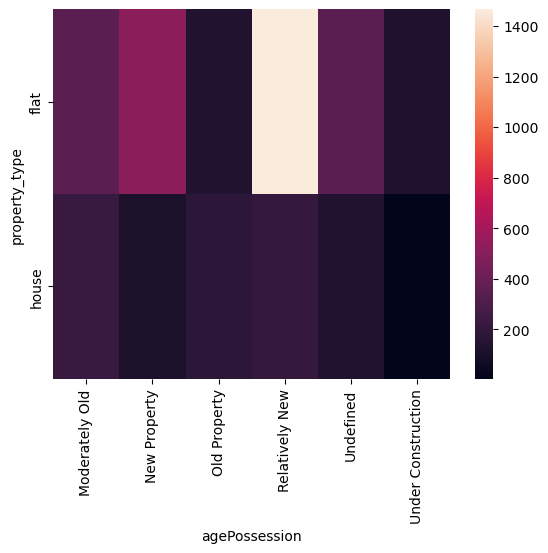

In [32]:
sns.heatmap(pd.crosstab(df['property_type'], df['agePossession']))

<Axes: xlabel='agePossession', ylabel='property_type'>

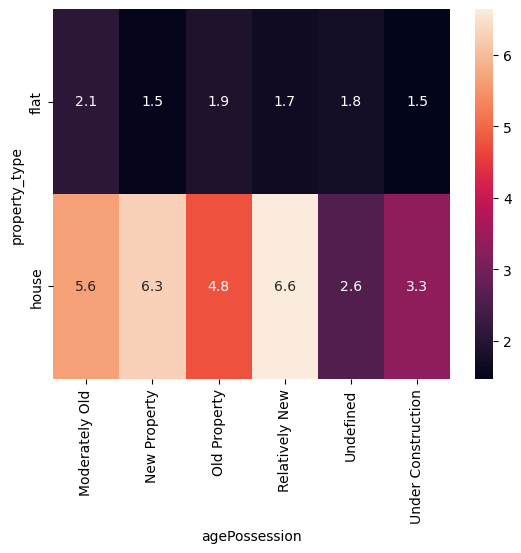

In [35]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='agePossession', values='price', aggfunc='mean'), annot=True)

<Axes: xlabel='bedRoom', ylabel='property_type'>

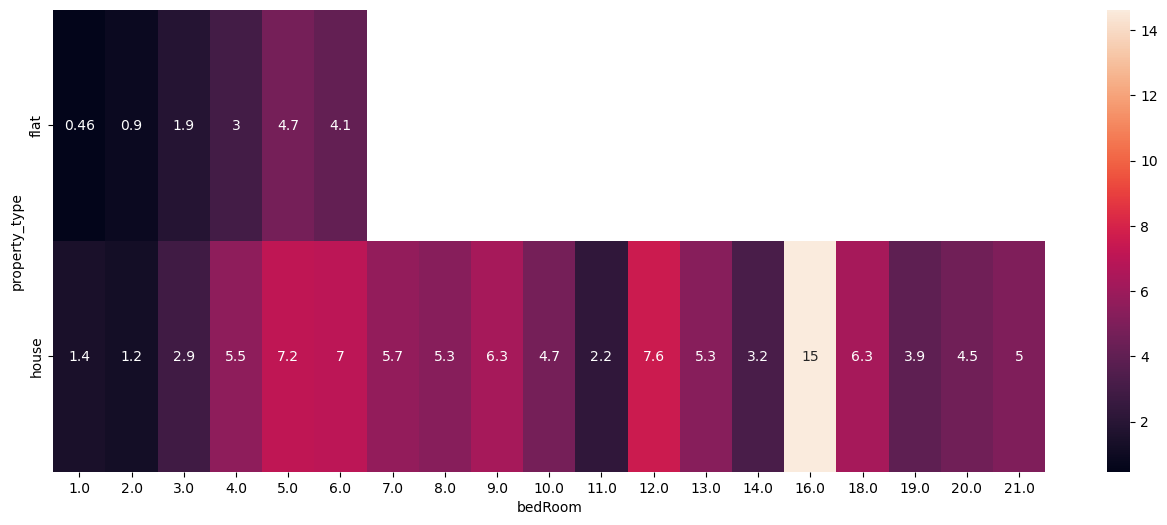

In [41]:
plt.figure(figsize=(16, 6))
sns.heatmap(pd.pivot_table(df, index='property_type', columns='bedRoom', values='price', aggfunc='mean'), annot=True)

<Axes: xlabel='furnishing_type', ylabel='property_type'>

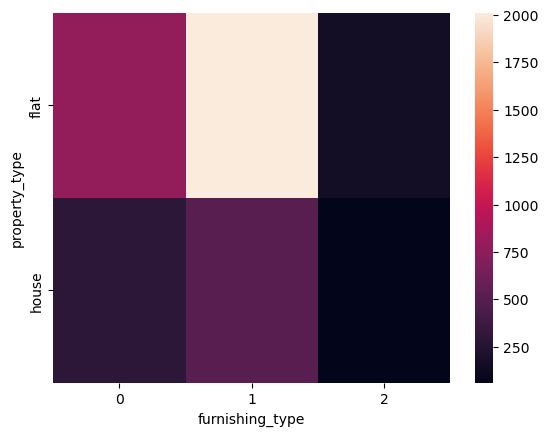

In [42]:
sns.heatmap(pd.crosstab(df['property_type'], df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

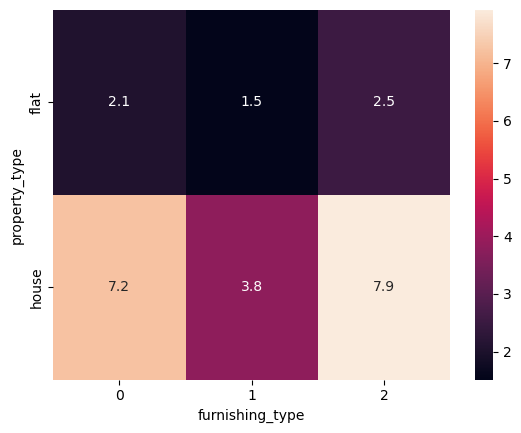

In [44]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='furnishing_type', values='price', aggfunc='mean'), annot=True)

<Axes: xlabel='property_type', ylabel='luxury_score'>

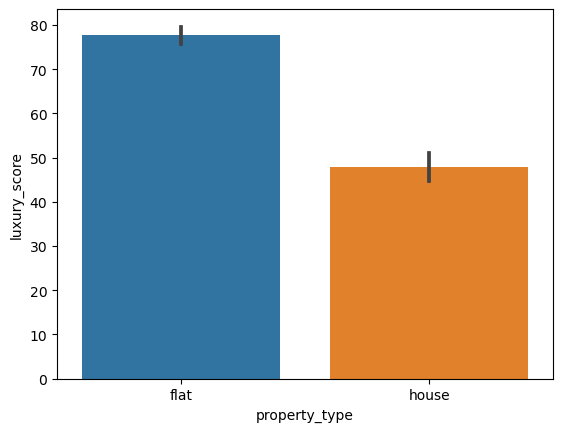

In [45]:
sns.barplot(x=df['property_type'], y=df['luxury_score'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

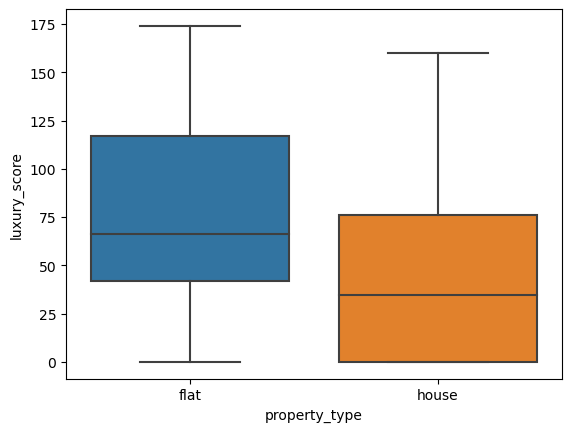

In [46]:
sns.boxplot(x=df['property_type'], y=df['luxury_score'])

In [47]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat             ss the leaf   sector 85   2.20          6934.0   
1          flat           m3m sierra 68   sector 68   1.08          8674.0   
2          flat           ashiana anmol  sohna road   0.99          8215.0   
3         house             independent   sector 38   8.00        230547.0   
4          flat  puri diplomatic greens  sector 111   3.70         12542.0   

     area                                       areaWithType  bedRoom  \
0  3173.0             Super Built up area 2812(261.24 sq.m.)      4.0   
1  1245.0  Super Built up area 1245(115.66 sq.m.)Built Up...      2.0   
2  1205.0  Super Built up area 1205(111.95 sq.m.)Carpet a...      2.0   
3   347.0  Built Up area: 347 (32.24 sq.m.)Carpet area: 2...     10.0   
4  2950.0  Super Built up area 2950(274.06 sq.m.)Built Up...      4.0   

   bathroom balcony  floorNum      facing   agePossession  \
0       5.0      3+       4.0        East  Relatively New   
1       2.0       3       1.0        West  Relatively New   
2       2.0       2       6.0        East       Undefined   
3      10.0      3+       1.0       North       Undefined   
4       5.0      3+      12.0  South-East  Relatively New   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2812.0            NaN          NaN           0             0   
1               1245.0         1130.0        930.0           0             0   
2               1205.0            NaN        900.0           0             0   
3                  NaN          347.0        215.0           0             0   
4               2950.0         2650.0       2450.0           0             1   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                1           106  
1           0           0       0                0           149  
2           0           0       0                1            49  
3           0           0       0                1             0  
4           0           0       0                0           158

<Axes: xlabel='sector', ylabel='property_type'>

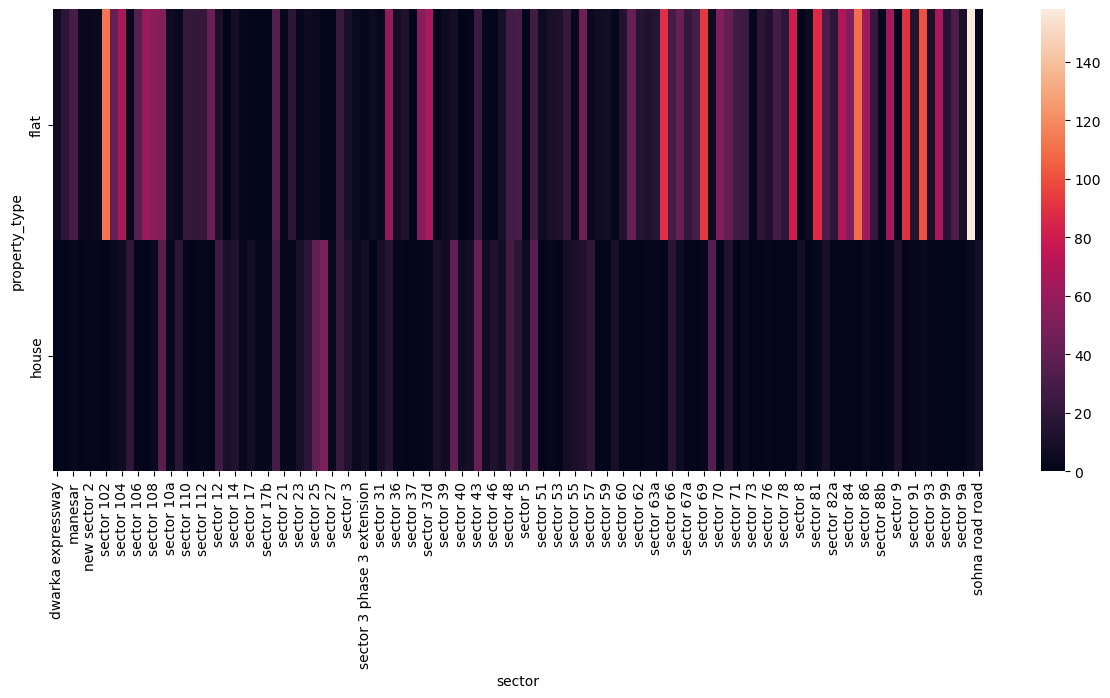

In [48]:
# sector analysis
plt.figure(figsize=(15, 6))
sns.heatmap(pd.crosstab(df['property_type'], df['sector'].sort_index()))

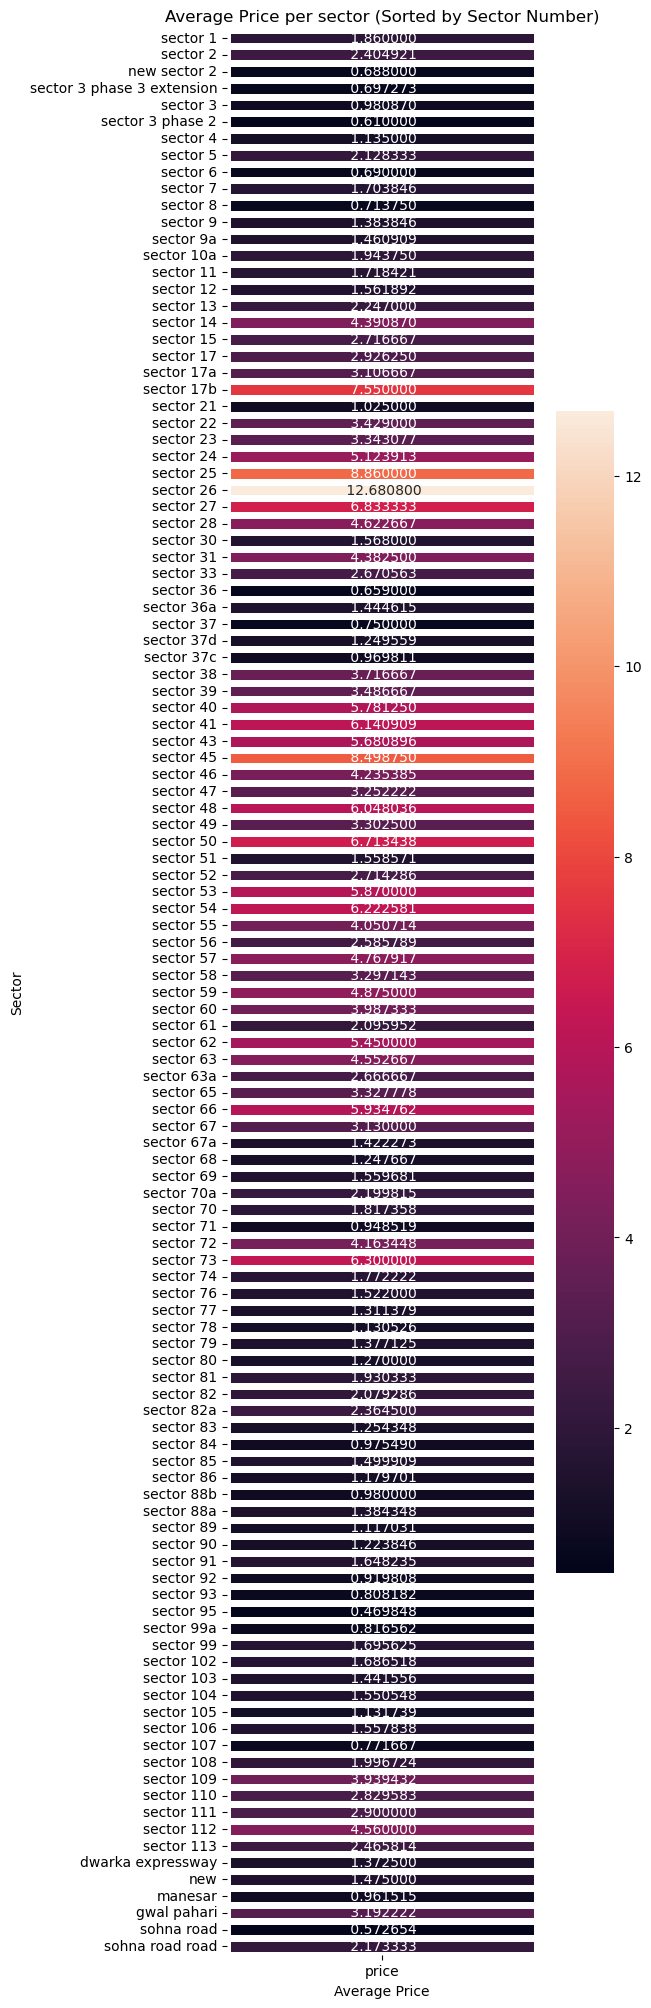

In [49]:
# Sector analysis

import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf') # Return a large number for non-numbered sectors
    
avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=" 2f", linewidth=5)
plt.title('Average Price per sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

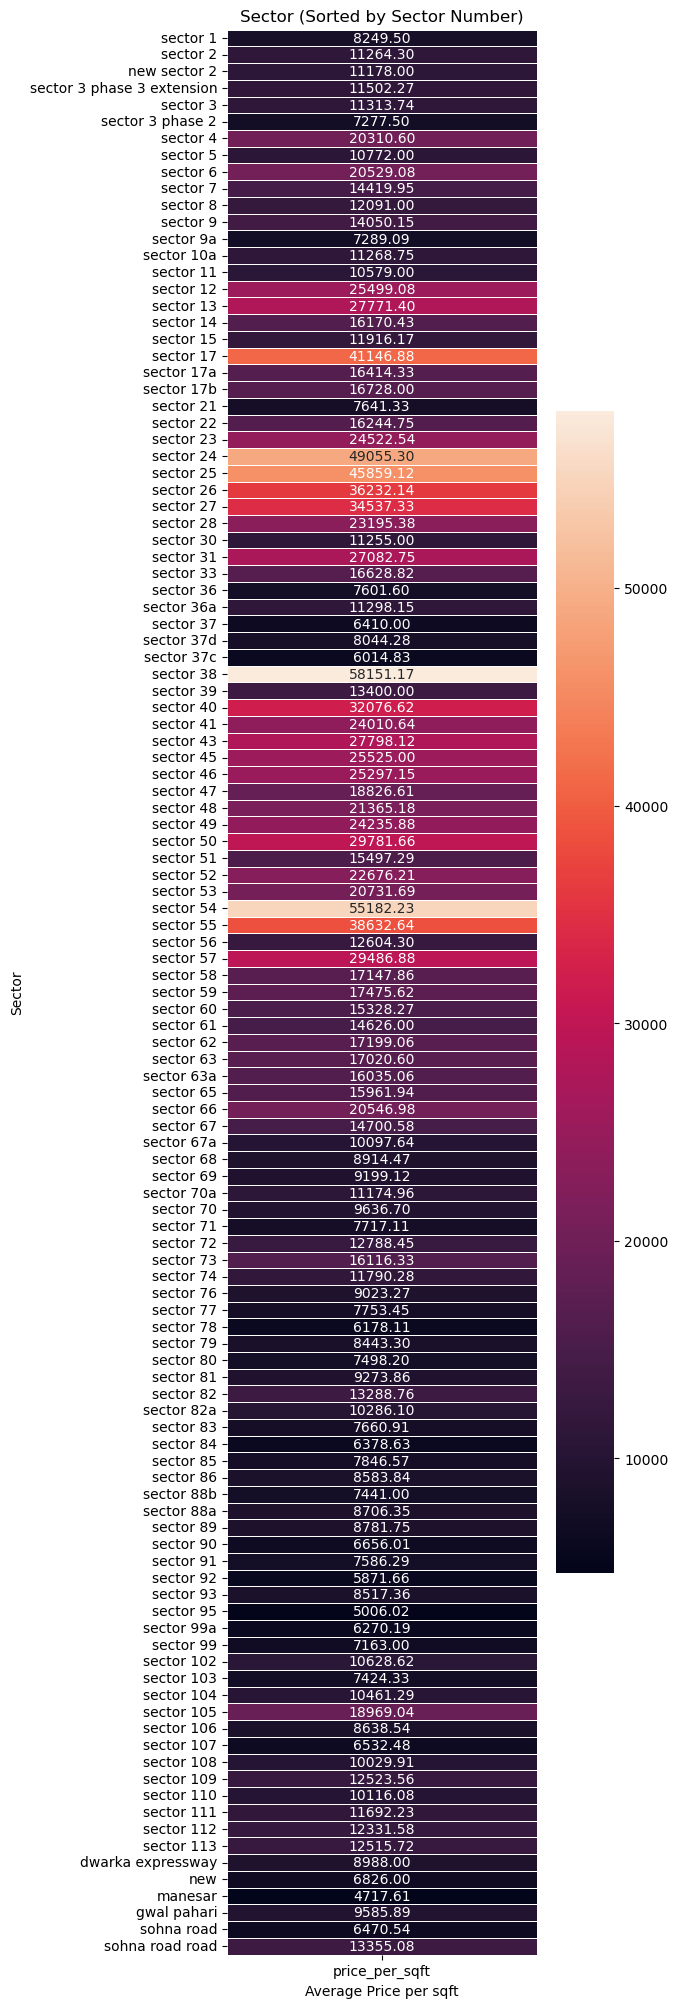

In [52]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

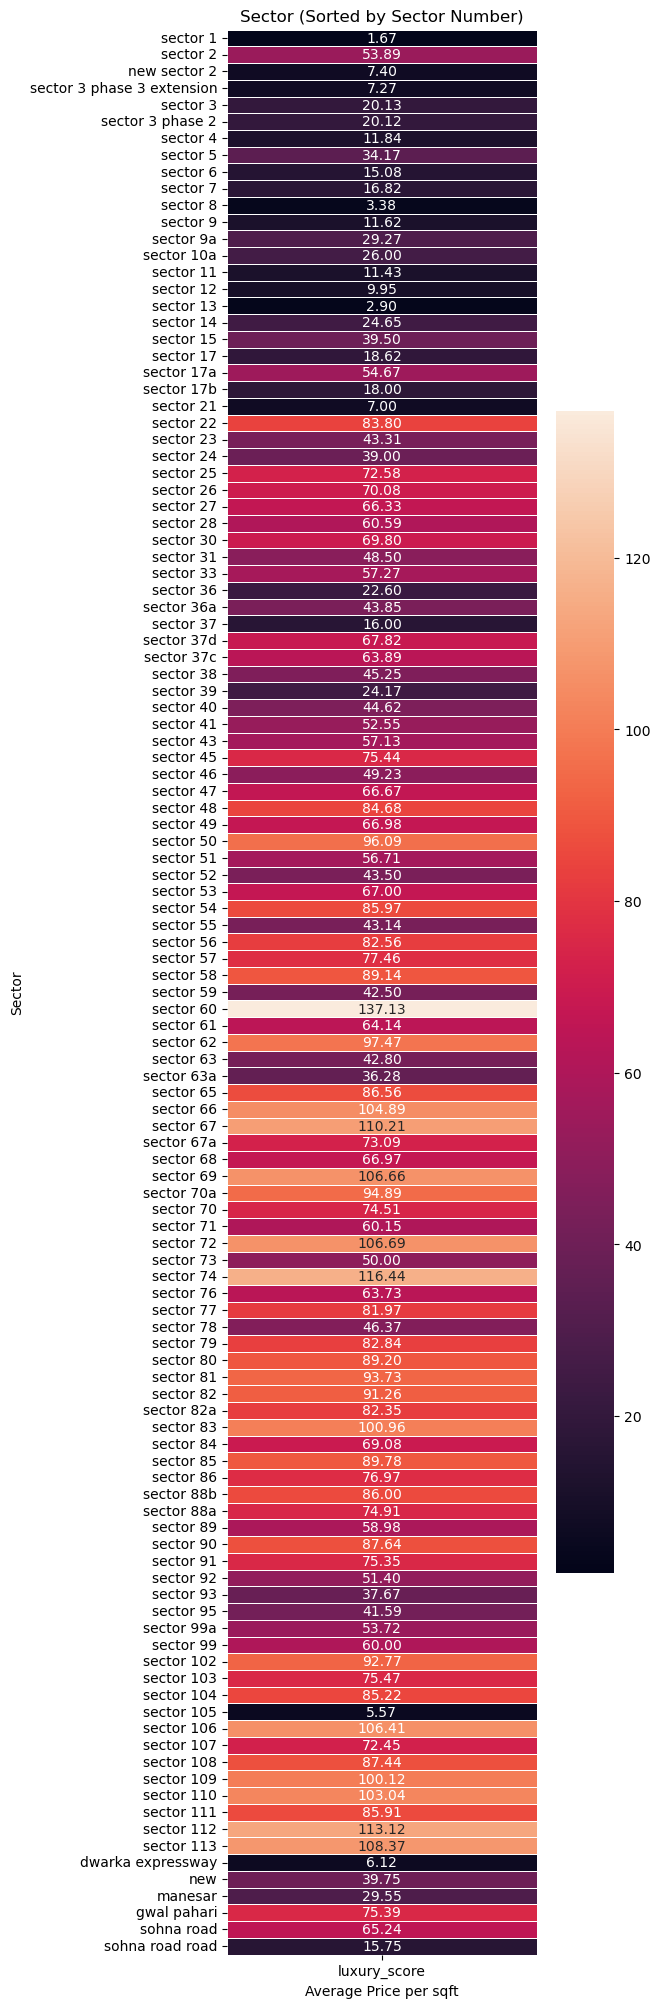

In [53]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

# price

<Axes: xlabel='area', ylabel='price'>

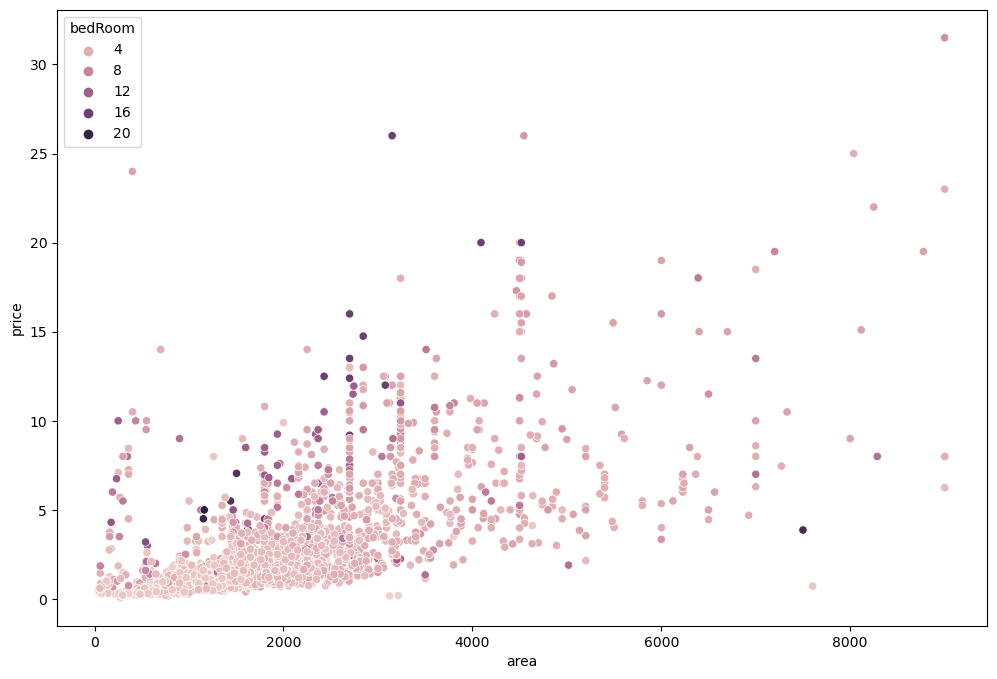

In [60]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area'] < 10000]['area'], y=df['price'], hue=df['bedRoom'])

<Axes: xlabel='area', ylabel='price'>

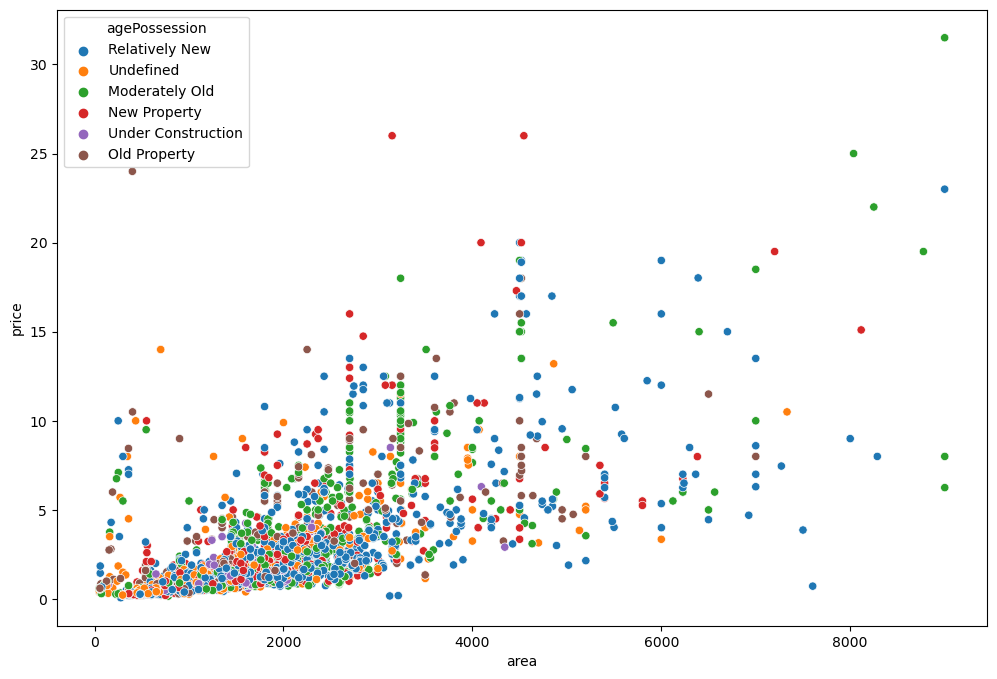

In [61]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area']<10000]['area'], y=df['price'], hue=df['agePossession'])

<Axes: xlabel='area', ylabel='price'>

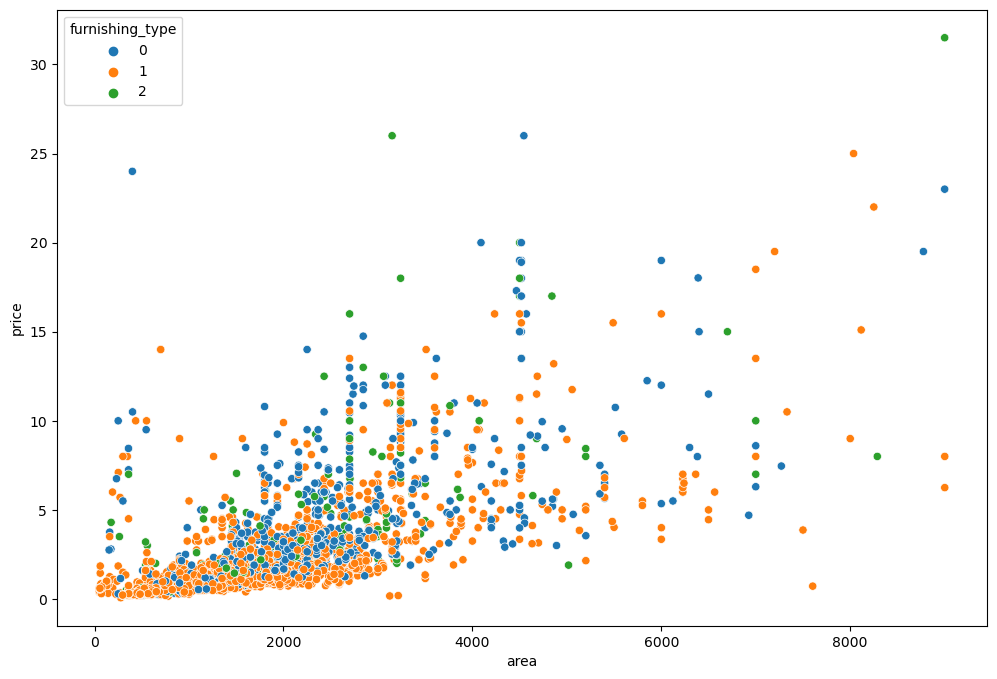

In [64]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area']<10000]['area'], y=df['price'], hue=df['furnishing_type'].astype('category'))

<Axes: xlabel='bedRoom', ylabel='price'>

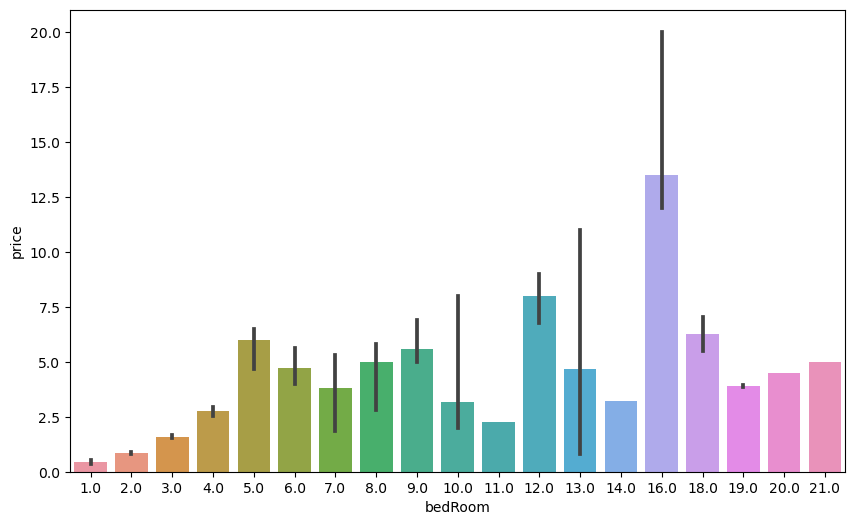

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['bedRoom'], y=df['price'], estimator='median')

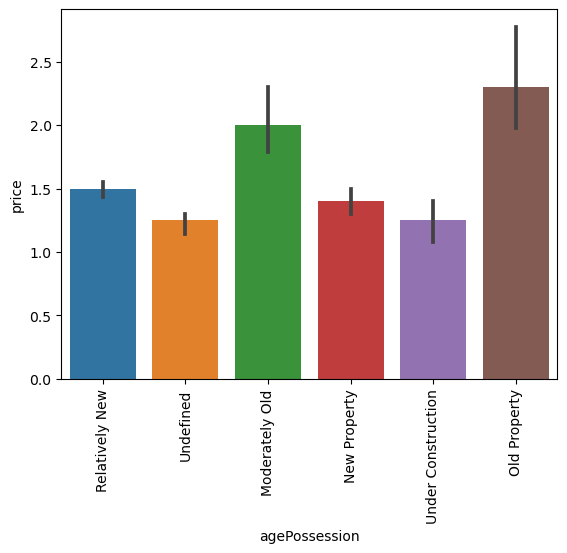

In [70]:
sns.barplot(x=df['agePossession'], y=df['price'], estimator='median')
plt.xticks(rotation='vertical')
plt.show()

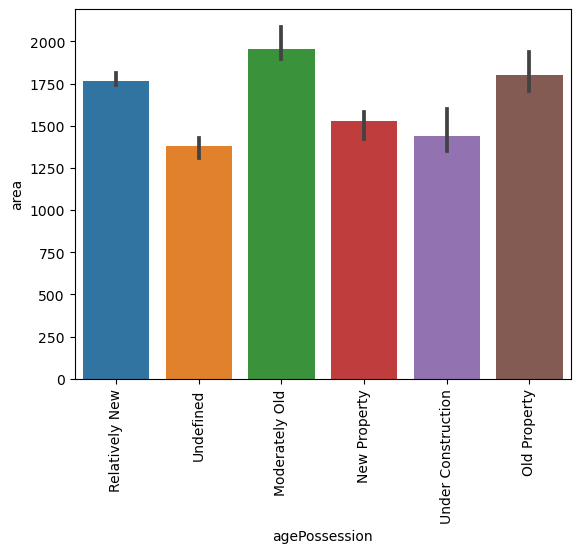

In [72]:
sns.barplot(x=df['agePossession'], y=df['area'], estimator='median')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price'>

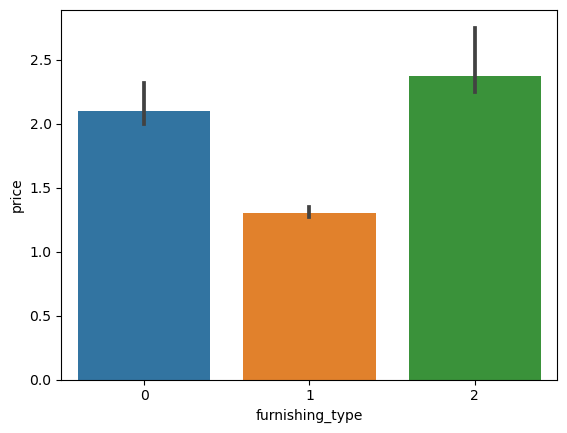

In [73]:
sns.barplot(x=df['furnishing_type'], y=df['price'], estimator='median')

<Axes: xlabel='luxury_score', ylabel='price'>

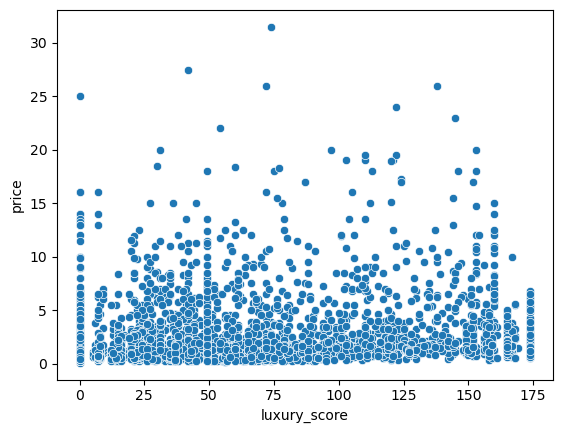

In [76]:
sns.scatterplot(x=df['luxury_score'], y=df['price'])

# Coorelation

C:\Users\amrit\AppData\Local\Temp\ipykernel_4368\3301218906.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

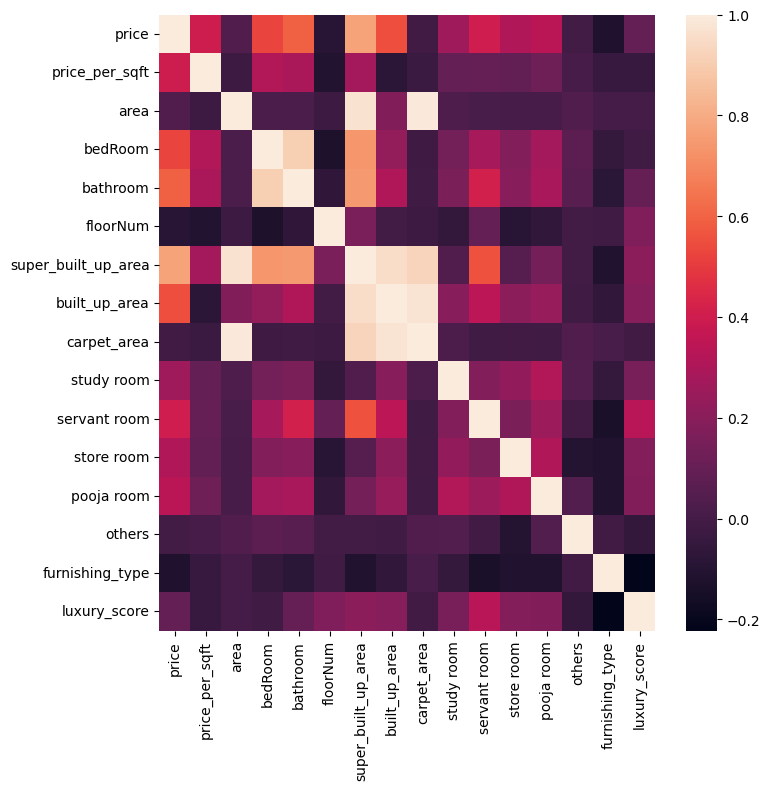

In [77]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [78]:
df.corr()['price'].sort_values(ascending=False)

C:\Users\amrit\AppData\Local\Temp\ipykernel_4368\1745294458.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending=False)


price                  1.000000
super_built_up_area    0.770988
bathroom               0.591407
built_up_area          0.549644
bedRoom                0.524576
servant room           0.400055
price_per_sqft         0.396901
pooja room             0.340483
store room             0.306110
study room             0.255702
luxury_score           0.097121
area                   0.035502
others                -0.006557
carpet_area           -0.010146
floorNum              -0.091301
furnishing_type       -0.118076
Name: price, dtype: float64

In [79]:
df.head()

property_type                 society      sector  price  price_per_sqft  \
0          flat             ss the leaf   sector 85   2.20          6934.0   
1          flat           m3m sierra 68   sector 68   1.08          8674.0   
2          flat           ashiana anmol  sohna road   0.99          8215.0   
3         house             independent   sector 38   8.00        230547.0   
4          flat  puri diplomatic greens  sector 111   3.70         12542.0   

     area                                       areaWithType  bedRoom  \
0  3173.0             Super Built up area 2812(261.24 sq.m.)      4.0   
1  1245.0  Super Built up area 1245(115.66 sq.m.)Built Up...      2.0   
2  1205.0  Super Built up area 1205(111.95 sq.m.)Carpet a...      2.0   
3   347.0  Built Up area: 347 (32.24 sq.m.)Carpet area: 2...     10.0   
4  2950.0  Super Built up area 2950(274.06 sq.m.)Built Up...      4.0   

   bathroom balcony  floorNum      facing   agePossession  \
0       5.0      3+       4.0        East  Relatively New   
1       2.0       3       1.0        West  Relatively New   
2       2.0       2       6.0        East       Undefined   
3      10.0      3+       1.0       North       Undefined   
4       5.0      3+      12.0  South-East  Relatively New   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               2812.0            NaN          NaN           0             0   
1               1245.0         1130.0        930.0           0             0   
2               1205.0            NaN        900.0           0             0   
3                  NaN          347.0        215.0           0             0   
4               2950.0         2650.0       2450.0           0             1   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                1           106  
1           0           0       0                0           149  
2           0           0       0                1            49  
3           0           0       0                1             0  
4           0           0       0                0           158

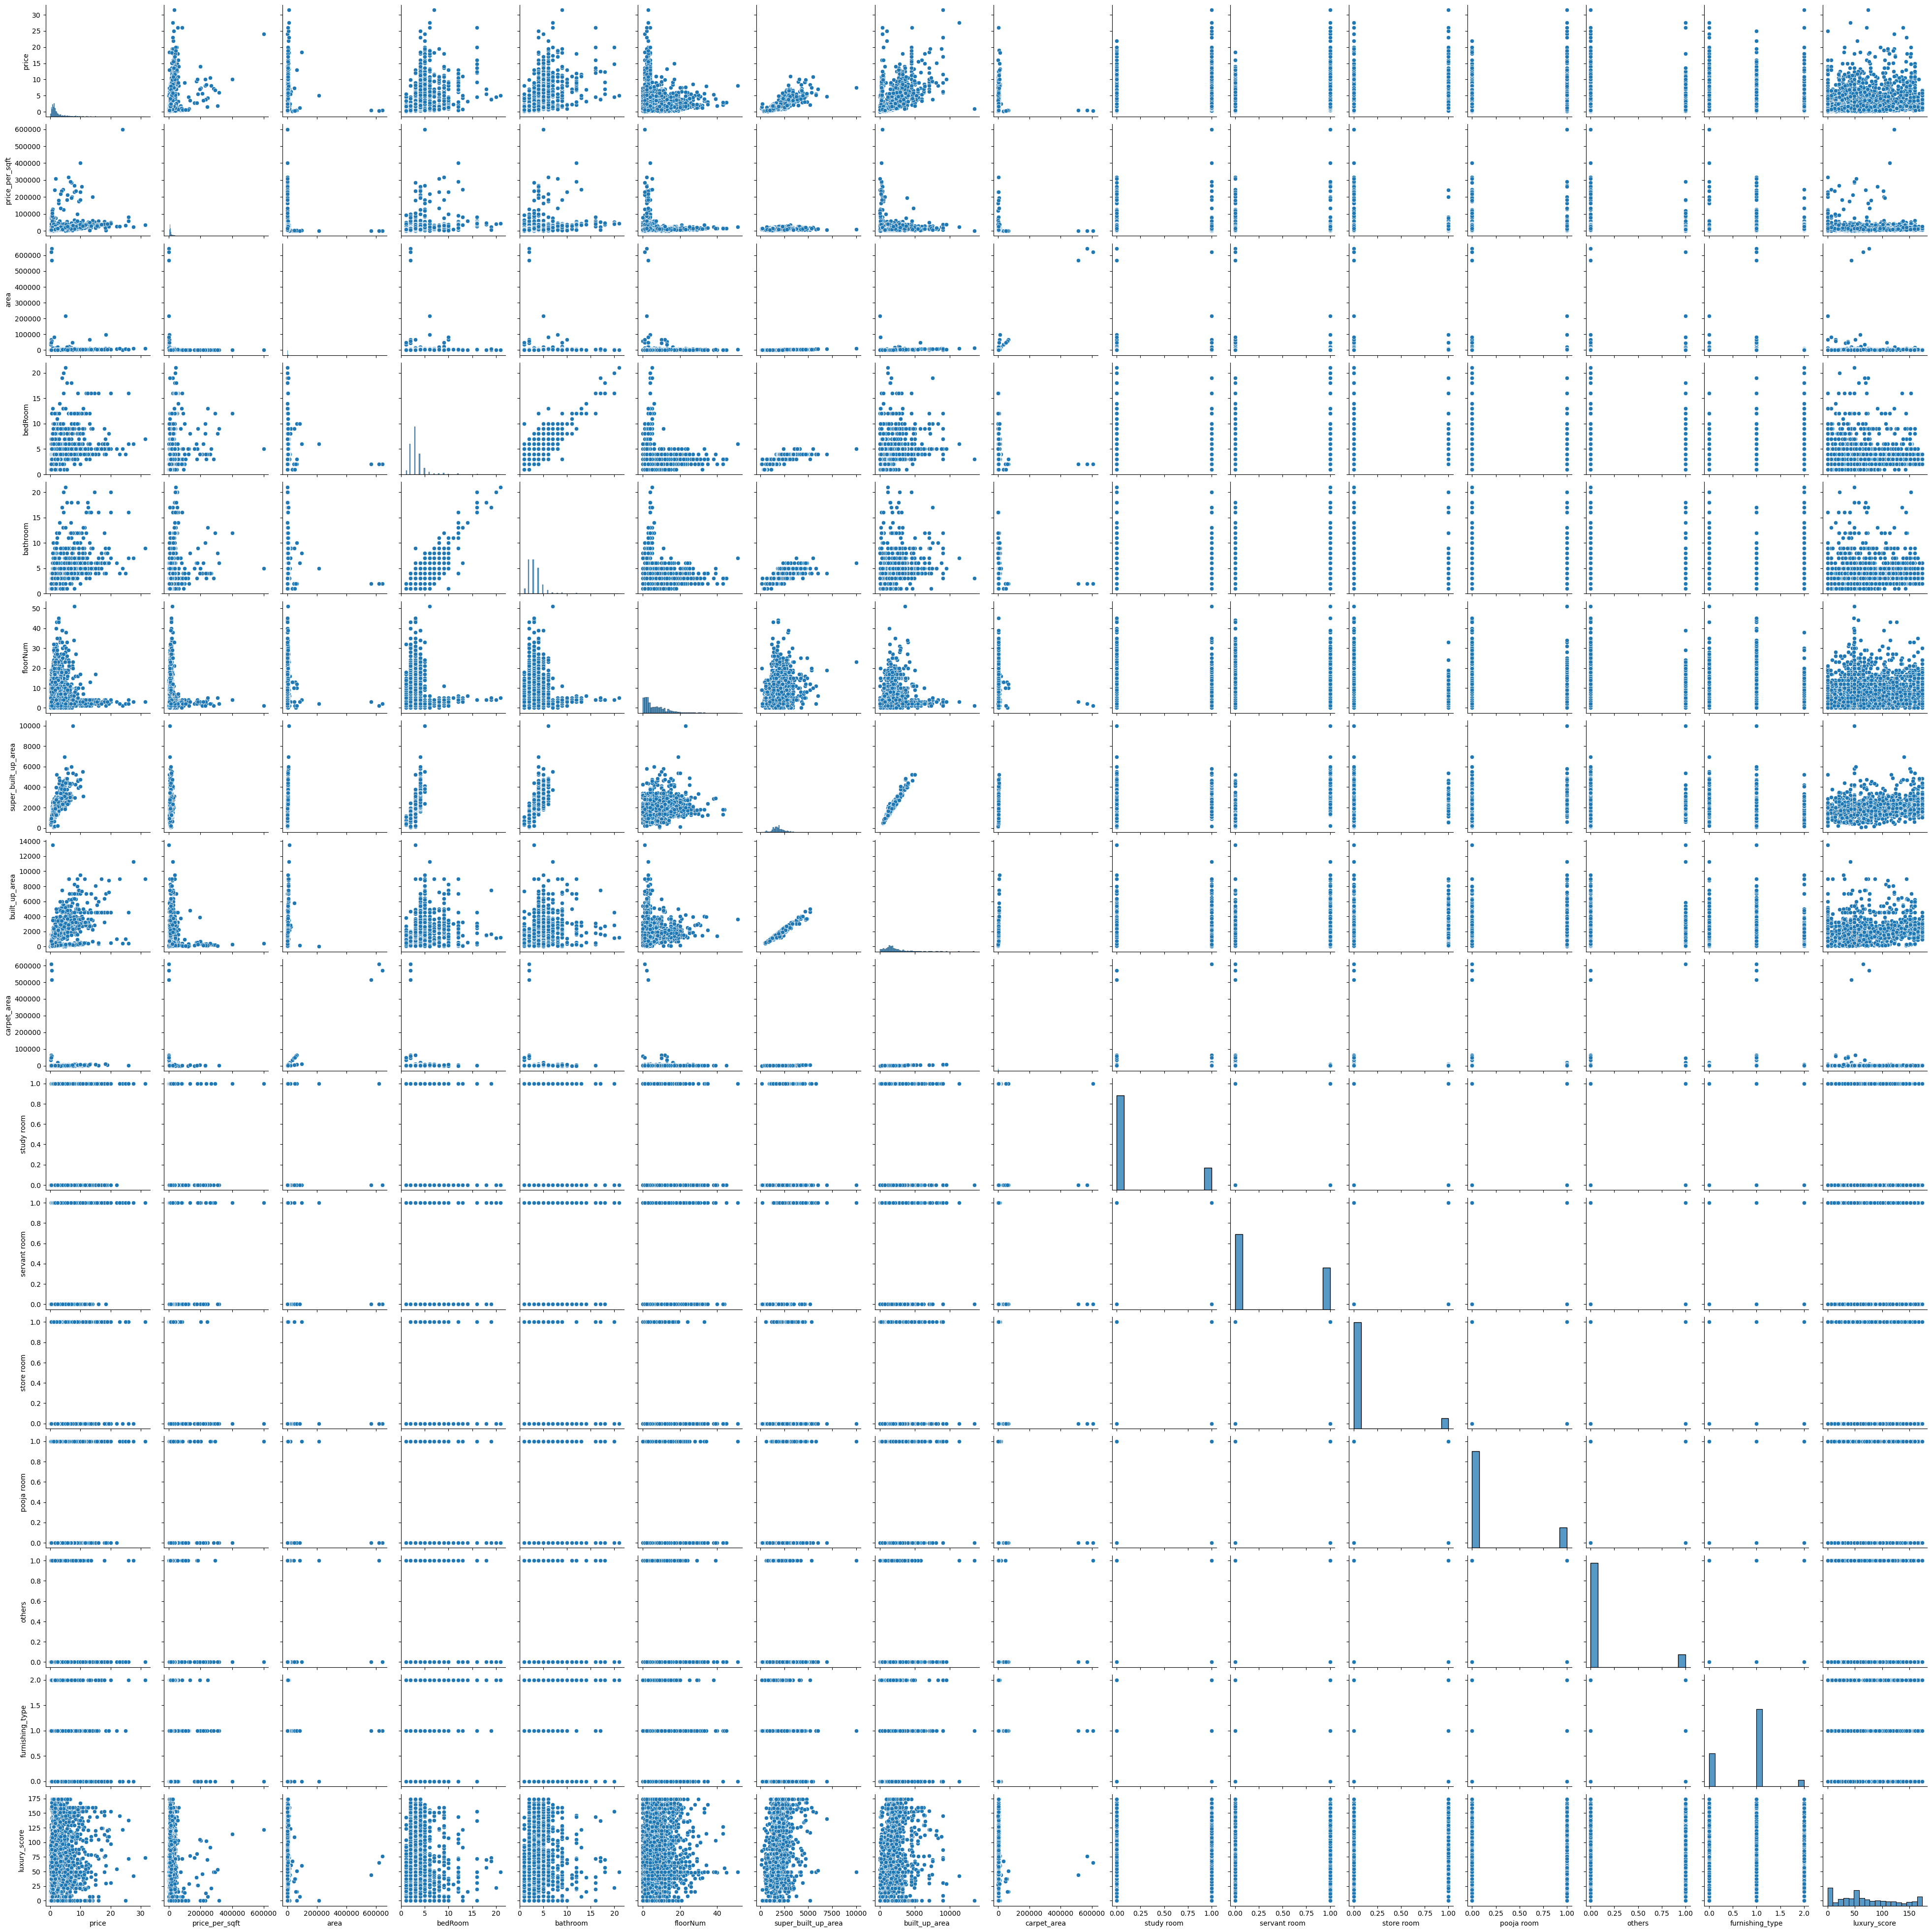

In [119]:
sns.pairplot(df)